In [1]:
from rdflib.graph import Graph
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import psutil

/home/reiva5/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[(1, 3), (1, 5)]


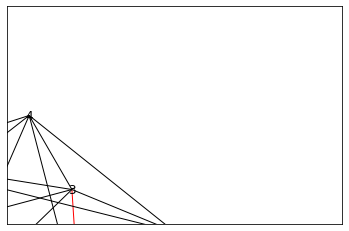

In [2]:
from networkx.algorithms.approximation.steinertree import steiner_tree
import networkx as nx

G = nx.Graph()
G.add_nodes_from([x for x in range(7)])
for u in range(7):
    for v in range(u+1, 7):
        G.add_edge(u,v)

res = steiner_tree(G, [1, 3, 5])
pos = nx.spring_layout(G, scale=0.5)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=res.edges, edge_color='r', arrows=True)
other = []
for x in G.edges:
    if x not in res.edges:
        other.append(x)
nx.draw_networkx_edges(G, pos, edgelist=other, arrows=False)
print(res.edges)
plt.show()

# Useful Method

In [3]:
%%time
# Parse URL into readable information
def getDesc(s):
    curr = -1
    while s.find("/", curr+1) != -1:
        curr = s.find("/", curr+1)
    return s[curr+1:]

hash_table = dict()
value_table = []
last_hash_value = 0

# Doing hash
def encryptHash(s):
    global hash_table
    return hash_table[s]

def decrpytHash(val):
    global value_table
    return value_table[val]

def doHash(s):
    global hash_table
    global last_hash_value
    if s not in hash_table:
        hash_table[s] = last_hash_value
        value_table.append(s)
        last_hash_value += 1

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.06 µs


# Read RDF Graph

## Read RDF Graph from nt file

### Get data from property edge

In [ ]:
%%time
mypath = "/home/reiva5/Desktop/TA/mapping_properties_chunk"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
WordToLink = dict() # To compress link into simple string
simple_rdfg = dict() #
full_rdfg = dict()
edge_names = dict()
anti_full_rdfg = dict()
vertices_at_edge = dict()
class_type = set()

classOf = "22-rdf-syntax-ns#type"
typeOf = "type"
subClassOf = "rdf-schema#subClassOf"

for filename in tqdm(onlyfiles):
    filename = "mapping_properties_chunk/" + filename

    g = Graph()
    result = g.parse(filename, format="nt")
    G = rdflib_to_networkx_multidigraph(result)

    for stmt in result:
        u, edge, v = [getDesc(x).lower() for x in stmt]
        if u not in WordToLink:
            WordToLink[u] = set()
        WordToLink[u].add(stmt[0])
        
        if v not in WordToLink:
            WordToLink[v] = set()
        WordToLink[v].add(stmt[1])

        doHash(u)
        doHash(edge)
        doHash(v)
        
        u = encryptHash(u)
        edge = encryptHash(edge)
        v = encryptHash(v)
        
        if u not in simple_rdfg:
            simple_rdfg[u] = set()
        simple_rdfg[u].add(v)

        if u not in edge_names:
            full_rdfg[u] = dict()
            edge_names[u] = dict()
        
        if v not in anti_full_rdfg:
            anti_full_rdfg[v] = dict()
        edge_names[u][v] = edge
        
        if edge not in anti_full_rdfg[v]:
            anti_full_rdfg[v][edge] = set()
        anti_full_rdfg[v][edge].add(u)
        
        if edge not in full_rdfg[u]:
            full_rdfg[u][edge] = set()
        full_rdfg[u][edge].add(v)

        if edge not in vertices_at_edge:
            vertices_at_edge[edge] = []
        vertices_at_edge[edge].append([u,v])

    print(psutil.virtual_memory())
# Plot Networkx instance of RDF Graph
# pos = nx.spring_layout(G, scale=4)
# edge_labels = nx.get_edge_attributes(G, 'r')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
# nx.draw(G, with_labels=True)

  0%|          | 0/34 [00:00<?, ?it/s]http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
  3%|▎         | 1/34 [01:28<48:50, 88.81s/it]

svmem(total=12466737152, available=8643448832, percent=30.7, used=3414331392, free=8239243264, active=3180896256, inactive=589737984, buffers=36052992, cached=777109504, shared=112123904, slab=258527232)


  6%|▌         | 2/34 [03:01<47:58, 89.95s/it]

svmem(total=12466737152, available=7727443968, percent=38.0, used=4330369024, free=7322116096, active=4233953280, inactive=451395584, buffers=36446208, cached=777805824, shared=112070656, slab=258547712)


  9%|▉         | 3/34 [04:31<46:26, 89.88s/it]

svmem(total=12466737152, available=6764036096, percent=45.7, used=5293662208, free=6196322304, active=5200539648, inactive=611430400, buffers=37912576, cached=938840064, shared=112156672, slab=258379776)


 12%|█▏        | 4/34 [06:04<45:28, 90.95s/it]

svmem(total=12466737152, available=5609934848, percent=55.0, used=6428807168, free=4892688384, active=6316412928, inactive=772829184, buffers=38211584, cached=1107030016, shared=126861312, slab=258482176)


 15%|█▍        | 5/34 [06:27<34:04, 70.51s/it]

svmem(total=12466737152, available=5643309056, percent=54.7, used=6382739456, free=4903985152, active=6268723200, inactive=807436288, buffers=38252544, cached=1141760000, shared=118632448, slab=258424832)


http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
 18%|█▊        | 6/34 [08:02<36:19, 77.85s/it]

svmem(total=12466737152, available=4428189696, percent=64.5, used=7597731840, free=3555536896, active=7481901056, inactive=941355008, buffers=38518784, cached=1274949632, shared=118706176, slab=258592768)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 21%|██        | 7/34 [09:33<36:52, 81.94s/it]

svmem(total=12466737152, available=3404689408, percent=72.7, used=8615796736, free=2381762560, active=8513212416, inactive=1075367936, buffers=39182336, cached=1429995520, shared=123703296, slab=259571712)


 24%|██▎       | 8/34 [11:05<36:46, 84.88s/it]

svmem(total=12466737152, available=2463563776, percent=80.2, used=9562705920, free=1307525120, active=9457811456, inactive=1208365056, buffers=39411712, cached=1557094400, shared=117919744, slab=259567616)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
 26%|██▋       | 9/34 [12:26<34:49, 83.59s/it]

svmem(total=12466737152, available=1559810048, percent=87.5, used=10499624960, free=413757440, active=10394374144, inactive=1197285376, buffers=39075840, cached=1514278912, shared=117350400, slab=257232896)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 29%|██▉       | 10/34 [13:59<34:38, 86.61s/it]

svmem(total=12466737152, available=756039680, percent=93.9, used=11304226816, free=380542976, active=10902544384, inactive=748519424, buffers=28950528, cached=753016832, shared=116584448, slab=256864256)


 32%|███▏      | 11/34 [15:50<36:00, 93.93s/it]

svmem(total=12466737152, available=164761600, percent=98.7, used=11956674560, free=237715456, active=10460819456, inactive=1334177792, buffers=11423744, cached=260923392, shared=98095104, slab=252518400)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 35%|███▌      | 12/34 [18:51<43:57, 119.90s/it]

svmem(total=12466737152, available=72093696, percent=99.4, used=12075773952, free=171347968, active=10595966976, inactive=1262755840, buffers=2473984, cached=217141248, shared=97959936, slab=260329472)


 38%|███▊      | 13/34 [20:36<40:21, 115.33s/it]

svmem(total=12466737152, available=50798592, percent=99.6, used=12102930432, free=147943424, active=10598027264, inactive=1275334656, buffers=1593344, cached=214269952, shared=90370048, slab=263405568)


 41%|████      | 14/34 [29:08<1:18:11, 234.58s/it]

svmem(total=12466737152, available=47915008, percent=99.6, used=12118310912, free=149594112, active=10618466304, inactive=1252098048, buffers=1114112, cached=197718016, shared=82325504, slab=268148736)


 44%|████▍     | 15/34 [30:57<1:02:18, 196.74s/it]

svmem(total=12466737152, available=62971904, percent=99.5, used=12093771776, free=162992128, active=10602950656, inactive=1248559104, buffers=2121728, cached=207851520, shared=90714112, slab=268394496)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 47%|████▋     | 16/34 [46:39<2:06:04, 420.26s/it]

svmem(total=12466737152, available=58519552, percent=99.5, used=12146757632, free=159924224, active=10552320000, inactive=1307471872, buffers=1261568, cached=158793728, shared=43085824, slab=266149888)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 50%|█████     | 17/34 [48:53<1:34:44, 334.40s/it]

svmem(total=12466737152, available=68268032, percent=99.5, used=12113993728, free=156565504, active=10610466816, inactive=1246699520, buffers=2203648, cached=193974272, shared=52269056, slab=265678848)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 53%|█████▎    | 18/34 [50:32<1:10:20, 263.80s/it]

svmem(total=12466737152, available=103579648, percent=99.2, used=12044759040, free=184774656, active=10521600000, inactive=1305403392, buffers=1761280, cached=235442176, shared=79597568, slab=265121792)


http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
 56%|█████▌    | 19/34 [1:10:28<2:15:54, 543.65s/it]

svmem(total=12466737152, available=53391360, percent=99.6, used=12139982848, free=160878592, active=10632593408, inactive=1235693568, buffers=1236992, cached=164638720, shared=61067264, slab=250753024)


 59%|█████▉    | 20/34 [1:12:15<1:36:17, 412.66s/it]

svmem(total=12466737152, available=88653824, percent=99.3, used=12079353856, free=162770944, active=10582413312, inactive=1276178432, buffers=1437696, cached=223174656, shared=52670464, slab=250830848)


http://dbpedia.org/datatype/polishZ\u0142oty does not look like a valid URI, trying to serialize this will break.
http://dbpedia.org/datatype/nicaraguanC\u00F3rdoba does not look like a valid URI, trying to serialize this will break.


### Get data from type edge

In [ ]:
%%time
mypath = "/home/reiva5/Desktop/TA/mapping_type_chunk"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for filename in tqdm(onlyfiles):
    filename = "mapping_type_chunk/" + filename
    g = Graph()
    result = g.parse(filename, format="nt")
    G = rdflib_to_networkx_multidigraph(result)

    for stmt in result:
        u, edge, v = [getDesc(x).lower() for x in stmt]
        if u not in simple_rdfg:
            simple_rdfg[u] = set()
        simple_rdfg[u].add(v)
        if u not in edge_names:
            full_rdfg[u] = dict()
            edge_names[u] = dict()
        if v not in anti_full_rdfg:
            anti_full_rdfg[v] = dict()
        edge_names[u][v] = edge
        if edge not in anti_full_rdfg[v]:
            anti_full_rdfg[v][edge] = set()
        anti_full_rdfg[v][edge].add(u)
        if edge not in full_rdfg[u]:
            full_rdfg[u][edge] = set()
        full_rdfg[u][edge].add(v)
        if edge not in vertices_at_edge:
            vertices_at_edge[edge] = []
        vertices_at_edge[edge].append([u,v])
        if edge == classOf:
            class_type.add(v)
        
        for item in stmt:
            if item[:4] == "http":
                tmp = getDesc(item)
                tmp = tmp.lower()
                if tmp not in WordToLink:
                    WordToLink[tmp] = set()
                WordToLink[tmp].add(item)


## Get the RDF Graph

In [ ]:
%%time
class_type

# Read Keyword to Analyze

In [ ]:
file_name = 'input.in'
f = open(file_name)
keyword = []
for line in f:
    keyword.extend([' '.join(x.lower().split()) for x in line.strip().split()])
keyword

In [ ]:
print(len(full_rdfg))
print(full_rdfg["joko_widodo"])

# Get Matching Construct

In [ ]:
def get_class_matching_construct(word):
    if word in class_type:
        return [[word]]
    return []

def get_value_matching_construct(word):
    res = set()
    for key in anti_full_rdfg:
        if word in key:
            for edge in anti_full_rdfg[key]:
                for node in anti_full_rdfg[key][edge]:
                    if classOf in full_rdfg[node]:
                        for current_class in full_rdfg[node][classOf]:
                            res.add(current_class)
    return [[x] for x in res]

def get_relationship_matching_construct(word):
    res = []
    if word in vertices_at_edge:
        for u, v in vertices_at_edge[word]:
            if classOf in full_rdfg[u]:
                for current_class in full_rdfg[u][classOf]:
                    if v in full_rdfg and classOf in full_rdfg[v]:
                        for target_class in full_rdfg[v][classOf]:
                            res.append([current_class, target_class])
    return res

def get_property_matching_construct(word):
    res = set()
    if word in vertices_at_edge:
        for u, v in vertices_at_edge[word]:
            if classOf in full_rdfg[u]:
                for current_class in full_rdfg[u][classOf]:
                    res.add(current_class)
    return [[x] for x in res]

# Create Structural Summary Graph

In [ ]:
%%time
structural_summary = nx.Graph()
defined_edges = dict()
property_edges = set()

for u, edges in tqdm(full_rdfg.items()):
    if classOf in edges:
        for current_class in edges[classOf]:
            for edge, vs in edges.items():
                if edge != classOf and edge != typeOf:
                    for v in vs:
                        if u == v : continue
                        if v in full_rdfg and classOf in full_rdfg[v]:
                            for target_class in full_rdfg[v][classOf]:
                                if target_class == current_class: continue
                                if current_class not in defined_edges:
                                    defined_edges[current_class] = dict()
                                defined_edges[current_class][target_class] = edge
                                property_edges.add(edge)
                                structural_summary.add_edge(current_class, target_class)

In [ ]:
for word in keyword:
    print('List of matching construct of word: ' + word)
    print('> Class matching construct: ' + str(get_class_matching_construct(word)))
    print('> Property matching construct: ' + str(get_property_matching_construct(word)))
    print('> Value matching construct: ' + str(get_value_matching_construct(word)))
    print('> Relationship matching construct: ' + str(get_relationship_matching_construct(word)))

# Find Pattern Graph

## Create Steiner Tree

In [ ]:
%%time

result_steiner_tree = []
terminal_node = []
for word in tqdm(keyword):
    tmp = []
    tmp.extend(get_class_matching_construct(word))
    tmp.extend(get_property_matching_construct(word))
    tmp.extend(get_value_matching_construct(word))
    tmp.extend(get_relationship_matching_construct(word))
    terminal_node.append(tmp)

ids = [0 for _ in keyword]
result_graphs = set()

def recur(depth):
    global ids
    global terminal_node
    global result_graphs
    if depth == len(ids):
        class_member = []
        for i in range(len(ids)):
            if ids[i] != -1:
                class_member.extend(terminal_node[i][ids[i]])
        result_graphs.add(steiner_tree(structural_summary, list(set(class_member))))
    else:
        awal = -1
        if len(terminal_node[depth]) != 0:
            awal = 0
        for i in range(awal,len(terminal_node[depth])):
            ids[depth] = i
            recur(depth+1)

recur(0)
for result_graph in tqdm(result_graphs):
    for u, v in result_graph.edges:
        if u in defined_edges and v in defined_edges[u]:
            print(u, ' ', defined_edges[u][v], ' ', v)
        else:
            print(v, ' ', defined_edges[v][u], ' ', u)
    print('done')

## Get Pattern Graph from Steiner Tree

In [ ]:
result_pattern_graph = set()
property_member = dict()

def recur_get_entity(depth):
    global class_members
    global result_pattern_graph
    global result_graph
    if depth == len(class_members):
#         print(translator)
        valid = True
        tmp_graph = []
        for u, v in result_graph.edges:
            if u not in defined_edges or v not in defined_edges[u]:
                u, v = v, u
            if translator[u] not in edge_names or translator[v] not in edge_names[translator[u]]:
                valid = False
            if not valid:
                break
            else:
                tmp_graph.append((translator[u], edge_names[translator[u]][translator[v]], translator[v]))
        if valid:
            for u in class_members:
                tmp_graph.append((translator[u], classOf, u))
                tmp_graph.append((translator[u], property_member[u], "$set"))
            result_pattern_graph.add(tuple(tmp_graph))
    else:
        for member in anti_full_rdfg[class_members[depth]][classOf]:
            translator[class_members[depth]] = member
            for edge in full_rdfg[member]:
                if edge != classOf and edge != typeOf and edge not in property_edges:
                    property_member[class_members[depth]] = edge
                    recur_get_entity(depth+1)
    
for result_graph in result_graphs:
    class_members = set()
    translator = dict()
    for u, v in result_graph.edges:
        translator[u] = ""
        translator[v] = ""
        class_members.add(u)
        class_members.add(v)
    class_members = list(class_members)
#     print(class_members)
    recur_get_entity(0)
    
result_pattern_graph = list(result_pattern_graph)
result_pattern_graph

# Read Profile Graph

In [ ]:
# from http://codereview.stackexchange.com/questions/1526/finding-all-k-subset-partitions

filename = "graph-profile.txt"
profile_graph = set()
for line in open(filename):
    u, edge, v = [getDesc(x).lower() for x in line.strip().split()]
    profile_graph.add((u, edge, v))

# Plot Networkx instance of RDF Graph
# pos = nx.spring_layout(G, scale=4)
# edge_labels = nx.get_edge_attributes(G, 'r')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
# nx.draw(G, with_labels=True)

# Find Graph Profile match Graph Pattern

## Measuring Similarity Between Pattern and Profile Graph

### Extrinsic Similarity

#### Concept Similarity

In [ ]:
def cs(P, U):
    class_member_p = set()
    class_member_u = set()
    both = 0
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            class_member_p.add(v)
    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            class_member_u.add(v)
            if v in class_member_p:
                both += 1
    print(class_member_p)
    print(class_member_u)
    return (both)/(len(class_member_p) + len(class_member_u) - both)

cs(result_pattern_graph[0], result_pattern_graph[1])

#### Relationship Similarity

In [ ]:
def rs(P, U):
    tuple_member_p = set()
    tuple_member_u = set()
    both = 0
    node_class_naming_p = dict()
    node_class_naming_u = dict()
#     print('> ' + str(P))
#     print('> ' + str(U))
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            node_class_naming_p[u] = v
    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            node_class_naming_u[u] = v
    
#     print(node_class_naming_p)
#     print(node_class_naming_u)
    for u, edge, v in P:
        if edge != classOf and edge != typeOf and v in node_class_naming_p and v != "$set" and u in node_class_naming_p:
            tuple_member_p.add((node_class_naming_p[u], edge, node_class_naming_p[v]))
    for u, edge, v in U:
#         print(u, v)
        if edge != classOf and edge != typeOf and v in node_class_naming_u and v != "$set" and u in node_class_naming_u:
            tuple_member_u.add((node_class_naming_u[u], edge, node_class_naming_u[v]))
            if (node_class_naming_u[u], edge, node_class_naming_u[v]) in tuple_member_p:
                both += 1
#     print(tuple_member_p)
#     print(tuple_member_u)
    return (both)/(len(tuple_member_p) + len(tuple_member_u) - both)

rs(result_pattern_graph[0], result_pattern_graph[1])

In [ ]:
def esim(P, U, alfa):
    if alfa > 1:
        alfa = 1
    elif alfa < 0:
        alfa = 0
    return alfa * cs(P,U) + (1-alfa) * rs(P,U)

esim(result_pattern_graph[0], result_pattern_graph[1], 0.5)

### Intrinsic Similarity

#### Entity Property Similarity

In [ ]:
def inside(A, B):
    for item in A:
        if item != "$x" and item not in B:
            found = False
            for item_b in B:
                if item in item_b:
                    found = True
                    break
            if not found:
                return False
    return True

def eps(P, U, f):
    entity_of_p = dict()
    entity_of_u = dict()
    anti_f = dict()
    
    num_entity_p = 0
    num_entity_u = 0
    
    for x, y in f.items():
        anti_f[y] = x
    
    for u, edge, v in P:
        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in f:
                entity_of_p[u] = (edge, v)
            num_entity_p += 1

    for u, edge, v in U:
        if edge != classOf and edge != typeOf and edge not in property_edges :
            if u in anti_f:
                entity_of_u[u] = (edge, v)
            num_entity_u += 1

    both = 0
    for e1, (p1, v1) in entity_of_p.items():
        if v1 == "$set":
            v1 = full_rdfg[e1][p1]
        if entity_of_u[f[e1]][1] == "$set":
            v2 = full_rdfg[f[e1]][entity_of_u[f[e1]][0]]
        else:
            v2 = set([entity_of_u[f[e1]][1]])
        
        if entity_of_u[f[e1]][0] == p1 and inside(v2, v1):
            both += 1
        else:
            print(str(entity_of_u[f[e1]][0]) + " != " + str(p1))
            print(str(v2) + " != " + str(v1))

    
    print(entity_of_p)
    print(entity_of_u)
    print(num_entity_p)
    print(num_entity_u)
    return (both + both)/(num_entity_p + num_entity_u)
# eps(result_pattern_graph[1], result_pattern_graph[0], {
#     'p1': 'p1',
#     'pl1': 'pl1'
# })

#### Entity Connection Similarity

In [ ]:
def dfs(curr, target, G, ans, visited):
    if curr == target:
        return True
    else:
        visited[curr] = True
        if curr in G:
            for (edge, x, Next) in G[curr]:
                if Next not in visited or not visited[Next]:
                    ans.append(edge)
                    if dfs(Next, target, G, ans, visited):
                        return True
                    else:
                        ans.pop()
        return False
            

def ecs(P, U, f):
    visited1 = dict()
    visited2 = dict()
    entity_of_p = dict()
    entity_of_u = dict()
    anti_f = dict()
    graph_of_p = dict()
    graph_of_u = dict()

    num_entity_p = 0
    num_entity_u = 0
    
    for x, y in f.items():
        anti_f[y] = x
    
    for u, edge, v in P:
        if edge in property_edges:
            if u not in graph_of_p:
                graph_of_p[u] = set()
            graph_of_p[u].add((edge, u, v))
            if v not in graph_of_p:
                graph_of_p[v] = set()
            graph_of_p[v].add((edge, v, u))

        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in f:
                entity_of_p[u] = (edge, v)
            num_entity_p += 1

    for u, edge, v in U:
        if edge in property_edges:
            if u not in graph_of_u:
                graph_of_u[u] = set()
            graph_of_u[u].add((edge, u, v))
            if v not in graph_of_u:
                graph_of_u[v] = set()
            graph_of_u[v].add((edge, v, u))

        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in anti_f:
                entity_of_u[u] = (edge, v)
            num_entity_u += 1
            
    matched_properties = []

    for e1, (p1, v1) in entity_of_p.items():
        if v1 == "$set":
            v1 = full_rdfg[e1][p1]
        if entity_of_u[f[e1]][1] == "$set":
            v2 = full_rdfg[f[e1]][entity_of_u[f[e1]][0]]
        else:
            v2 = set([entity_of_u[f[e1]][1]])
        
        if entity_of_u[f[e1]][0] == p1 and inside(v2, v1):
            matched_properties.append((e1, p1, v1))

#     print(matched_properties)
    both = 0
    total = 0
    for i in range(len(matched_properties)):
        for j in range(i+1, len(matched_properties)):
            ans_p = []
            ans_u = []
#             print(matched_properties[i][0], matched_properties[j][0])
#             print(f[matched_properties[i][0]], f[matched_properties[j][0]])
            if dfs(matched_properties[i][0], matched_properties[j][0], graph_of_p, ans_p, visited1) and dfs(f[matched_properties[i][0]], f[matched_properties[j][0]], graph_of_u, ans_u, visited2):
                ans_p = set(ans_p)
                ans_u = set(ans_u)
                for e in ans_p:
                    if e in ans_u:
                        both += 2
                total += len(ans_p)
                total += len(ans_u)
#             print(ans_p)
#             print(ans_u)
            visited1 = dict()
            visited2 = dict()
    
    if both == 0:
        return 0
    else:
        return both / (total)

# print(ecs(result_pattern_graph[1], result_pattern_graph[0], {
#     'p1': 'p1',
#     'pl1': 'pl1'
# }))

In [ ]:
def iterate(depth, result, class_names, Domain, Range, P, U, f, beta):
    if depth == len(Domain):
        function = dict()
        for u, v in f:
            function[u] = v
        value_eval = beta * eps(P, U, function) + (1 - beta) * ecs(P, U, function)
        if value_eval > result[0]:
            result[0] = value_eval
            result[1] = function
        return True
            
    else:
        if class_names[depth] in Range:
            for entity_p in Domain[class_names[depth]]:
                for entity_u in Range[class_names[depth]]:
                    f.append((entity_p, entity_u))
                    if iterate(depth+1, result, class_names, Domain, Range, P, U, f, beta):
                        f.pop()
                    else:
                        return False
        else:
            result[0] = 0
            return False
                    
def isim(P, U, beta):
    MAX = [-1, {}]
    member_class_p = dict()
    member_class_u = dict()
    f = []
    class_names = []
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            if v not in member_class_p:
                member_class_p[v] = set()
                class_names.append(v)
            member_class_p[v].add(u)

    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            if v not in member_class_u:
                member_class_u[v] = set()
            member_class_u[v].add(u)

#     print(class_names)
#     print(member_class_p)
#     print(member_class_u)
    iterate(0, MAX, class_names, member_class_p, member_class_u, P, U, f, beta)
    return MAX

# isim(result_pattern_graph[0], result_pattern_graph[2], 0.5)

In [ ]:
def sim(P,U,gamma):
    val, func = isim(P, U, 0.5)
    return (gamma * esim(P,U,0.5) + (1-gamma) * val, func)

print(result_pattern_graph[0])
print(result_pattern_graph[1])
sim(result_pattern_graph[0], result_pattern_graph[2], 0.7)

In [ ]:
ans = [-1, {}, set()]
gamma = 0.5
threshold = 0.5

# print(cs(result_pattern_graph[0], profile_graph))
# print(rs(result_pattern_graph[0], profile_graph))
# print(eps(result_pattern_graph[0], profile_graph, {'p2':'y', 'c1':'x'}))
# print(ecs(result_pattern_graph[0], profile_graph, {'p2':'y', 'c1':'x'}))
# print(profile_graph)
# print(sim(result_pattern_graph[0], profile_graph, gamma))
print('Result: ')
for pgraph in result_pattern_graph:
    val, func = sim(pgraph, profile_graph, gamma)
    if val > threshold:
        ans[0] = val
        ans[1] = func
        ans[2] = pgraph
        for x, _ in func.items():
            for item in WordToLink[x]:
                print('<answer>\n\t' + str(item) + '\n</answer>')
